Importing Required Libraries

In [77]:
import numpy as np
import scipy.optimize as optim
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42) # Random seed is set so that we can get similar results when we run the notebook again and again

Creating the required basic Scatter Plot

In [78]:
A1, A2, A3 = np.random.random(size = 3)   # np.random.random generates a random float between 0 and 1.
print('The values of constants for the function g(x) are: \n', 'A1 = ', A1, '\n A2 = ', A2, '\n A3 = ', A3)

The values of constants for the function g(x) are: 
 A1 =  0.3745401188473625 
 A2 =  0.9507143064099162 
 A3 =  0.7319939418114051


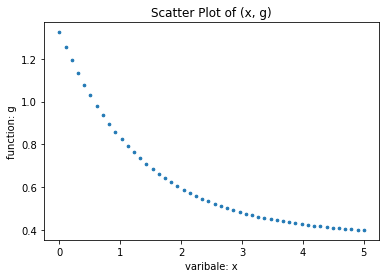

In [79]:
x = np.linspace(start = 0, stop = 5, num = 50)
g = A1 + A2*np.exp(-A3*x)
plt.scatter(x, g, s = 7);
plt.xlabel('varibale: x');
plt.ylabel('function: g');
plt.title('Scatter Plot of (x, g)');

Visualization of Noise

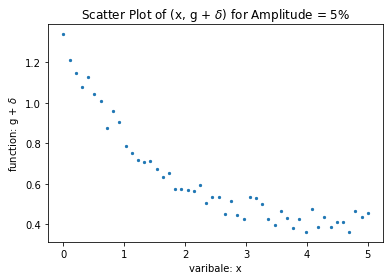

In [80]:
amplitude = 0.05
delta = np.random.uniform(low = -amplitude*np.max(g), high = amplitude*np.max(g), size = 50)
g_noise_5 = g + delta
plt.scatter(x, g_noise_5, s = 5);
plt.xlabel('varibale: x');
plt.ylabel('function: g + $\delta$');
plt.title('Scatter Plot of (x, g + $\delta$) for Amplitude = 5%');

Curve Fitting using Scipy

In [81]:
def h(x,B1,B2,B3):
    return B1 + B2*np.exp(-x*B3)

params_5, _ = optim.curve_fit(h, x, g_noise_5, p0=[0.15, 0.5, 1])
print(params_5)

[0.38353831 0.93580602 0.76797379]


In [82]:
params_5 - np.array([A1, A2, A3])  # Required Difference, between initial and fitted values. Comment added in the report

array([ 0.00899819, -0.01490829,  0.03597984])

Required Superposed Visualization of Curve Fitting

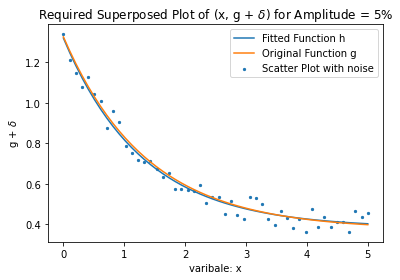

In [83]:
plt.plot(x,h(x,params_5[0], params_5[1], params_5[2]))
plt.scatter(x, g_noise_5, s=5);
plt.plot(x, g);
plt.legend(['Fitted Function h', 'Original Function g', 'Scatter Plot with noise'])
plt.xlabel('varibale: x');
plt.ylabel('g + $\delta$');
plt.title('Required Superposed Plot of (x, g + $\delta$) for Amplitude = 5%');

Experimenting with different Amplitudes

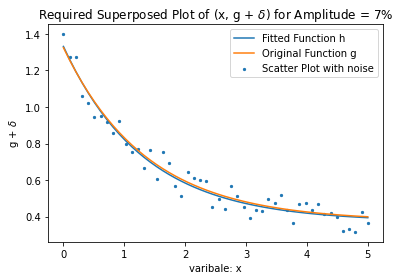

In [84]:
amplitude = 0.07
delta = np.random.uniform(low = -amplitude*np.max(g), high = amplitude*np.max(g), size = 50)
g_noise_7 = g + delta
params_7, _ = optim.curve_fit(h, x, g_noise_7, p0=[0.15, 0.5, 1])
plt.plot(x,h(x,params_7[0], params_7[1], params_7[2]))
plt.scatter(x, g_noise_7, s=5);
plt.plot(x, g);
plt.legend(['Fitted Function h', 'Original Function g', 'Scatter Plot with noise'])
plt.xlabel('varibale: x');
plt.ylabel('g + $\delta$');
plt.title('Required Superposed Plot of (x, g + $\delta$) for Amplitude = 7%');

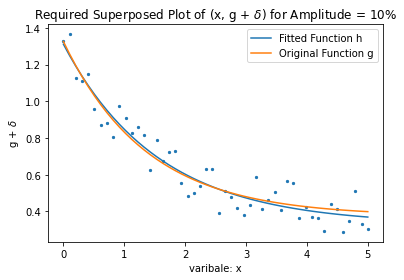

In [85]:
amplitude = 0.1
delta = np.random.uniform(low = -amplitude*np.max(g), high = amplitude*np.max(g), size = 50)
g_noise_10 = g + delta
params_10, _ = optim.curve_fit(h, x, g_noise_10, p0=[0.15, 0.5, 1])
plt.plot(x,h(x,params_10[0], params_10[1], params_10[2]), label='fitted')
plt.plot(x, g);
plt.legend(['Fitted Function h', 'Original Function g', 'Scatter Plot with noise'])
plt.xlabel('varibale: x');
plt.ylabel('g + $\delta$');
plt.title('Required Superposed Plot of (x, g + $\delta$) for Amplitude = 10%');
plt.scatter(x, g_noise_10, s=5);

Required Difference in parameters Table

In [86]:
params = np.array([params_5, params_7, params_10])
difference = params - np.array([[A1, A2, A3]]*3)
diff_table = pd.DataFrame(difference, columns=['A1-B1', 'A2-B2', 'A3-B3'], index=['5%', '7%', '10%'])
diff_table # Comments added in the Report

,A1-B1,A2-B2,A3-B3
5%,0.008998,-0.014908,0.035980
7%,-0.002515,0.008925,0.024021
10%,-0.045163,0.030440,-0.093000


Percentage Difference in parameters calculated to analyse better

In [87]:
difference_percentage = np.abs(difference / np.array([[A1, A2, A3]]*3))*100
diff_table_percentage = pd.DataFrame(difference_percentage, columns=['A1-B1', 'A2-B2', 'A3-B3'], index=['5%', '7%', '10%'])
diff_table_percentage 

,A1-B1,A2-B2,A3-B3
5%,2.402463,1.568115,4.915320
7%,0.671552,0.938718,3.281536
10%,12.058134,3.201828,12.705088
